### Importação dos dados



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento

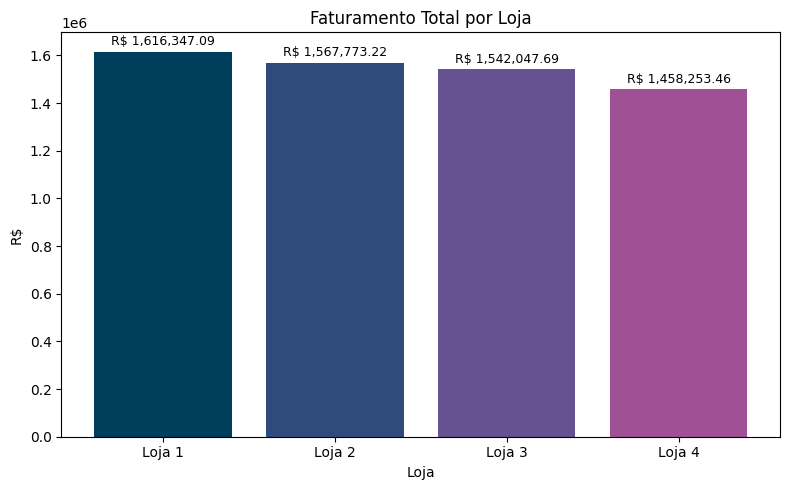

In [49]:
cores_faturamento = ["#003f5c", "#2f4b7c", "#665191", "#a05195"]

x = range(len(faturamento_total))
y = faturamento_total.values
labels = faturamento_total.index

plt.figure(figsize=(8,5))
bars = plt.bar(x, y, color=cores_faturamento)
plt.xticks(x, labels)
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.xlabel('Loja')

for i, valor in enumerate(y):
    plt.text(i, valor + (valor * 0.01), f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


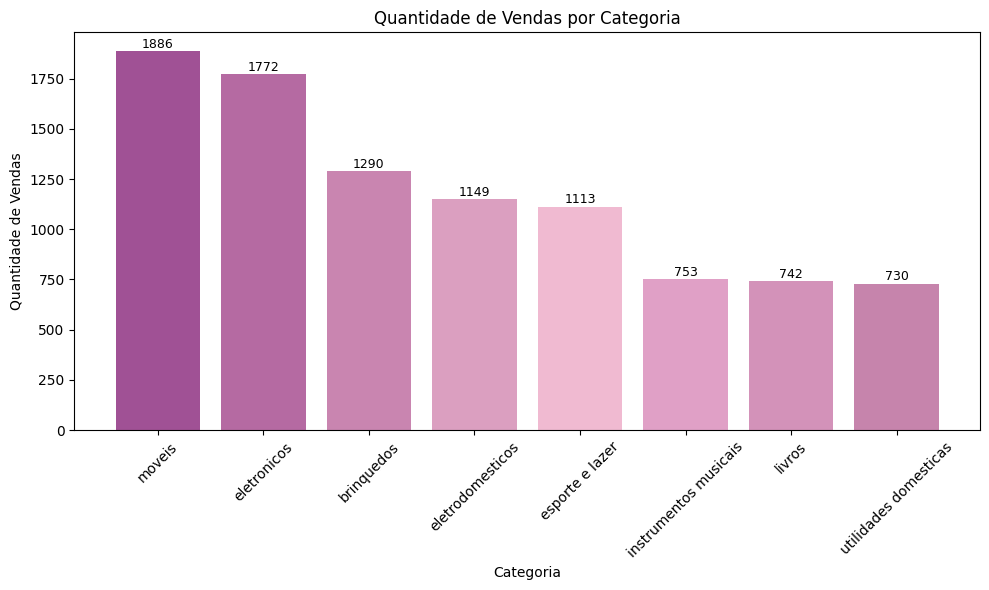

In [ ]:
cores_categoria = ["#a05195", "#b56aa2", "#c985b0", "#db9fc0", "#f0bad1", "#e0a0c6", "#d392b9", "#c684ac", "#b9759e", "#ac6d94"]

num_categorias = len(categoria)
x = range(num_categorias)
y = categoria.values
labels = categoria.index

plt.figure(figsize=(10,6))
bars = plt.bar(x, y, color=cores_categoria[:num_categorias])
plt.xticks(x, labels, rotation=45)
plt.title('Quantidade de Vendas por Categoria')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Categoria')

for i, bar in enumerate(bars):
    altura = bar.get_height()
    plt.text(i, altura + 1, f'{int(altura)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

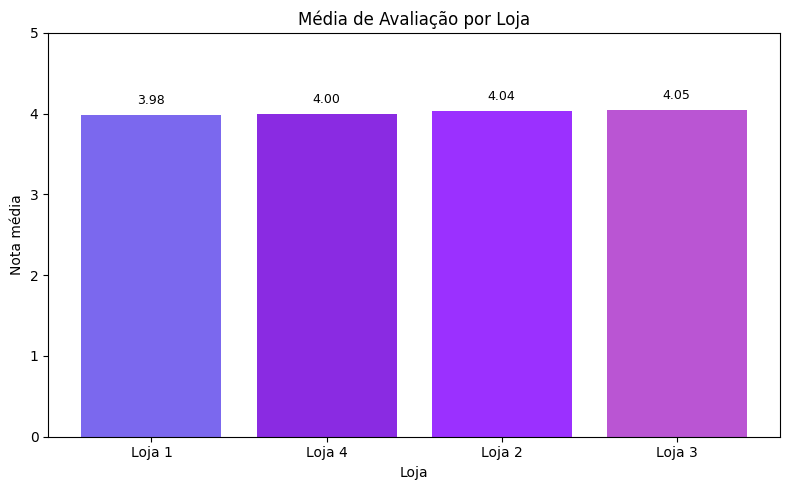

In [ ]:
cores_avaliacao = ["#7b68ee", "#8a2be2", "#9b30ff", "#ba55d3"]

x = range(len(avaliacao_media))
y = avaliacao_media.values

plt.figure(figsize=(8,5))
bars = plt.bar(x, y, color=cores_avaliacao)
plt.xticks(x, avaliacao_media.index)
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota média')
plt.xlabel('Loja')
plt.ylim(0, 5)

for i, bar in enumerate(bars):
    altura = bar.get_height()
    plt.text(i, altura + 0.1, f'{altura:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

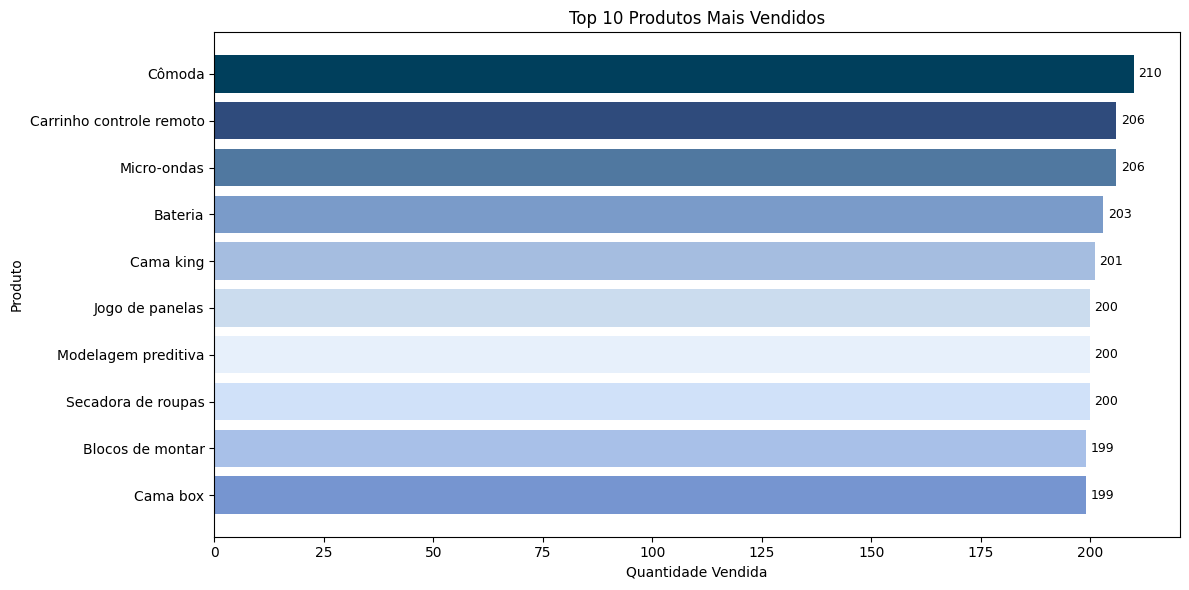

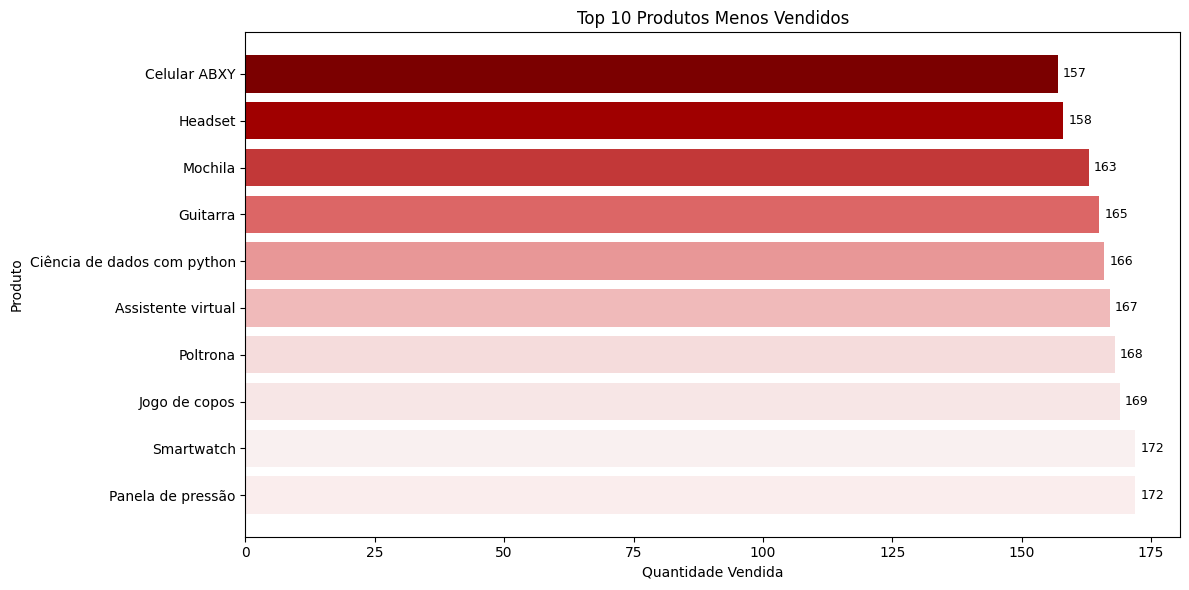

In [ ]:
cores_mais_vendidos = ['#003f5c', '#2f4b7c', '#5078a0', '#7a9bc9', '#a5bde0', '#cbdcee', '#e7f0fb', '#d0e1f9', '#a8c0e8', '#7695d0']
cores_menos_vendidos = ['#7b0000', '#a00000', '#c23838', '#dc6666', '#e89797', '#f0baba', '#f5dcdc', '#f7e6e6', '#f9f0f0', '#faeded']

mais_vendidos = df.groupby("Produto")["Produto"].count().sort_values(ascending=False).head(10)
x_mv = range(len(mais_vendidos))
y_mv = mais_vendidos.values
produtos_mv = mais_vendidos.index

plt.figure(figsize=(12,6))
bars_mv = plt.barh(x_mv, y_mv, color=cores_mais_vendidos)
plt.yticks(x_mv, produtos_mv)
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")

for i, bar in enumerate(bars_mv):
    largura = bar.get_width()
    plt.text(largura + 1, bar.get_y() + bar.get_height()/2, f'{int(largura)}', va='center', fontsize=9)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

menos_vendidos = df.groupby("Produto")["Produto"].count().sort_values(ascending=True).head(10)
x_mv = range(len(menos_vendidos))
y_mv = menos_vendidos.values
produtos_mv = menos_vendidos.index

plt.figure(figsize=(12,6))
bars_mv = plt.barh(x_mv, y_mv, color=cores_menos_vendidos)
plt.yticks(x_mv, produtos_mv)
plt.title("Top 10 Produtos Menos Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")

for i, bar in enumerate(bars_mv):
    largura = bar.get_width()
    plt.text(largura + 1, bar.get_y() + bar.get_height()/2, f'{int(largura)}', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


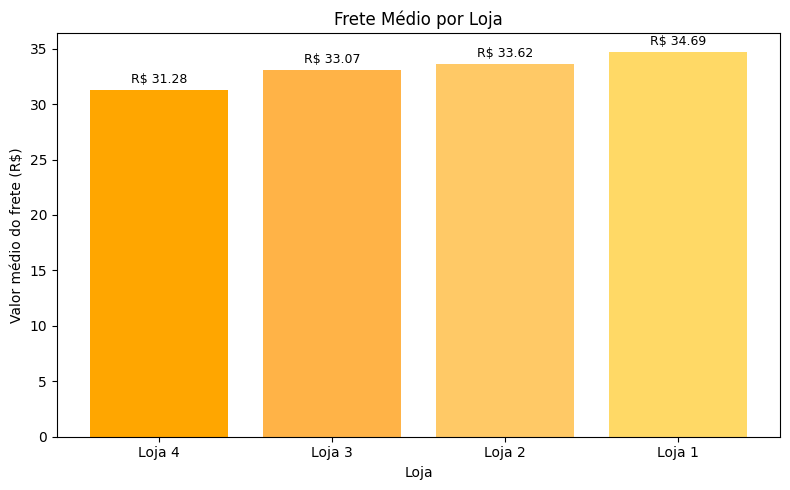

In [45]:
cores_frete = ["#ffa600", "#ffb347", "#ffc966", "#ffd966"]

x = range(len(frete_medio))
y = frete_medio.values

plt.figure(figsize=(8,5))
plt.bar(x, y, color=cores_frete)
plt.xticks(x, frete_medio.index)
plt.title('Frete Médio por Loja')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Loja')

for i, valor in enumerate(y):
    plt.text(i, valor + valor*0.01, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


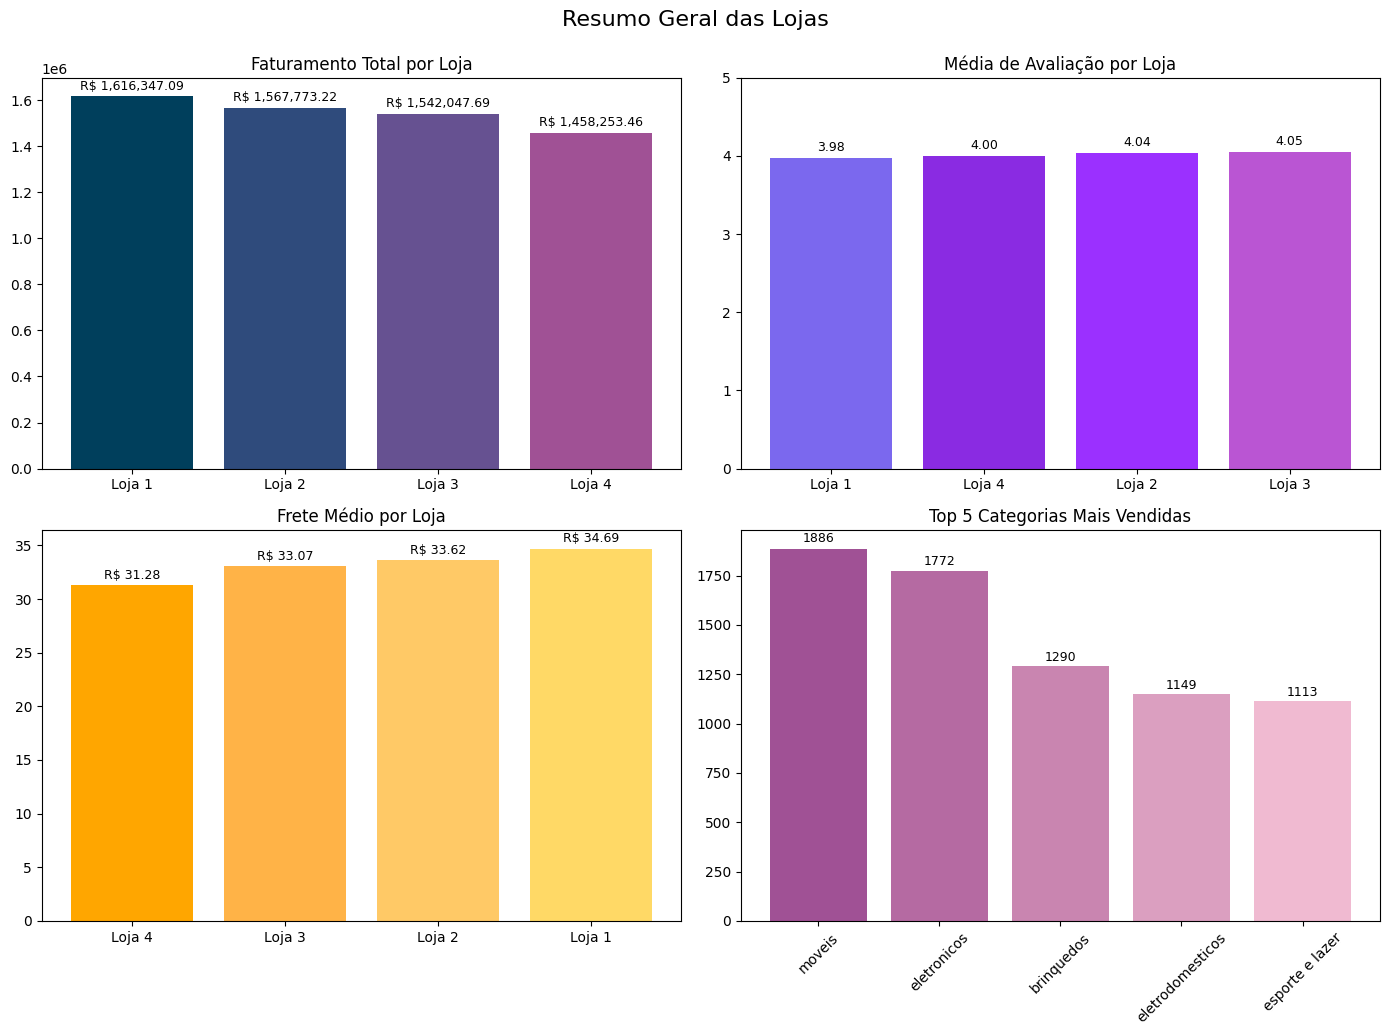

In [43]:
cores_faturamento = ["#003f5c", "#2f4b7c", "#665191", "#a05195"]      
cores_avaliacao = ["#7b68ee", "#8a2be2", "#9b30ff", "#ba55d3"]       
cores_frete = ["#ffa600", "#ffb347", "#ffc966", "#ffd966"]              
cores_categoria = ["#a05195", "#b56aa2", "#c985b0", "#db9fc0", "#f0bad1"] 

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

x = range(len(faturamento_total))
y = faturamento_total.values
axs[0,0].bar(x, y, color=cores_faturamento)
axs[0,0].set_xticks(x)
axs[0,0].set_xticklabels(faturamento_total.index)
axs[0,0].set_title('Faturamento Total por Loja')
for i, valor in enumerate(y):
    axs[0,0].text(i, valor + valor*0.01, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

x = range(len(avaliacao_media))
y = avaliacao_media.values
axs[0,1].bar(x, y, color=cores_avaliacao)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(avaliacao_media.index)
axs[0,1].set_ylim(0, 5)
axs[0,1].set_title('Média de Avaliação por Loja')
for i, valor in enumerate(y):
    axs[0,1].text(i, valor + 0.05, f'{valor:.2f}', ha='center', va='bottom', fontsize=9)

x = range(len(frete_medio))
y = frete_medio.values
axs[1,0].bar(x, y, color=cores_frete)
axs[1,0].set_xticks(x)
axs[1,0].set_xticklabels(frete_medio.index)
axs[1,0].set_title('Frete Médio por Loja')
for i, valor in enumerate(y):
    axs[1,0].text(i, valor + valor*0.01, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

x = range(len(categoria[:5]))
y = categoria.values[:5]
axs[1,1].bar(x, y, color=cores_categoria)
axs[1,1].set_xticks(x)
axs[1,1].set_xticklabels(categoria.index[:5])
axs[1,1].set_title('Top 5 Categorias Mais Vendidas')
axs[1,1].tick_params(axis='x', rotation=45)
for i, valor in enumerate(y):
    axs[1,1].text(i, valor + valor*0.01, f'{int(valor)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Resumo Geral das Lojas', fontsize=16, y=1.03)
plt.show()


In [ ]:
## 🏁 Conclusão

A **Loja 4** é a melhor opção para ser vendida.

Apesar do frete mais barato, ela tem o menor faturamento entre as lojas, indicando baixo desempenho financeiro.

A avaliação dos clientes também é baixa, com muitos dando notas entre 1 e 3.

A loja se destaca apenas em duas categorias, sendo que uma delas tem poucas vendas no geral.

Por esses motivos, recomendamos que o Sr. João venda a Loja 4 para investir em negócios com maior potencial.